In [116]:
# Import necessary packages

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

# Question 1 

1) Define a bond and explain how it is issued. Explain the relationship between bonds and interest rates.

A bond is a fixed-income financial instrument that represents a loan made by an investor to a borrower, typically a government or corporation. It is a form of debt where the issuer of the bond promises to repay the principal amount (the face value or par value) to the bondholder at a specified maturity date. In return for lending money, the bondholder receives periodic interest payments, known as coupon payments, over the life of the bond.

The relationship between bonds and interest rates is inverse. When interest rates rise, the value of existing bonds in the market tends to decrease. This is because investors can now earn higher interest rates from newly issued bonds, making existing bonds with lower coupon rates less attractive. As a result, bond prices fall.

Conversely, when interest rates decline, the value of existing bonds tends to increase. This is because existing bonds with higher coupon rates become more valuable since they offer higher yields compared to newly issued bonds with lower rates. As a result, bond prices rise.

Changes in interest rates can also affect bond yields. When interest rates rise, bond yields increase, and vice versa. Yields reflect the total return an investor can expect to earn from a bond, including both coupon payments and any potential capital gains or losses from changes in bond prices.

# Question 2

From the website of the European Central Bank – “Euro area yield curves” section:
- Select a specific date for the AAA rated bonds (or for all bonds).

- For the selected date, choose from the spot yield curve 8 consecutive semi-annual spot yields (The yields are those of zero-coupon bonds, with a par value of €100. 8 consecutive semi-annual spot yields represent a period of 4 years.):

In [117]:
# Selected date: may 2nd 2023 - Triple A rated bonds for a 0 to 5 years period. 
dic_yields = {0.5:3.003,1:2.977,1.5:2.841,2:2.700,
              2.5:2.587,3:2.504,3.5:2.448,4:2.412}
dic_yields

{0.5: 3.003,
 1: 2.977,
 1.5: 2.841,
 2: 2.7,
 2.5: 2.587,
 3: 2.504,
 3.5: 2.448,
 4: 2.412}

# Question 3

Define a spot rate. Calculate the price of the 8 STRIPS from which the chosen 8 spot rates are deducted by reversing the
equation on slide 17. Are the STRIPS below or above par value? Why?

In the context of bonds, a spot rate refers to the interest rate or yield on a bond for a specific maturity or time period. It represents the rate of return an investor would receive if they purchased the bond and held it until maturity, without any reinvestment of coupon payments.The spot rate is typically expressed as an annualized percentage and is derived from the current market prices of bonds with different maturities. It reflects the market's expectation of future interest rates and serves as a benchmark for pricing fixed-income securities.

In [118]:
df_3 = pd.DataFrame({'Maturity': dic_yields.keys(), 'Spot_rate': dic_yields.values()})
df_3['STRIPS'] = 100 / (((df_3['Spot_rate']/100)/2 +1) ** (2*df_3['Maturity']))
df_3

,Maturity,Spot_rate,STRIPS
0,0.5,3.003,98.520712
1,1.0,2.977,97.088174
2,1.5,2.841,95.856763
3,2.0,2.700,94.777443
4,2.5,2.587,93.776088
5,3.0,2.504,92.806488
6,3.5,2.448,91.836545
7,4.0,2.412,90.855227


The strips are all below the par values. It means that when maturity is increasing, the curve rate is supposed to decrease.

# Question 4

Define a forward rate. From the chosen spot rates, calculate the respective forward rates. Plot the forward yield curve.

In [119]:
df_3['index_q4'] = df_3.index.values + 1

numerator = (1+ df_3['Spot_rate']/2) ** df_3['index_q4']
denominator = (1+ df_3['Spot_rate'].shift(1)/2) ** df_3['index_q4'].shift(1)

df_3['forward'] = 2 * (numerator/denominator -1)
df_3['forward'][0] = df_3['Spot_rate'][0]

df_3

C:\Users\loand\AppData\Local\Temp\ipykernel_19964\3136248294.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['forward'][0] = df_3['Spot_rate'][0]


,Maturity,Spot_rate,STRIPS,index_q4,forward
0,0.5,3.003,98.520712,1,3.003000
1,1.0,2.977,97.088174,2,2.951135
2,1.5,2.841,95.856763,3,2.580047
3,2.0,2.700,94.777443,4,2.301166
4,2.5,2.587,93.776088,5,2.161523
5,3.0,2.504,92.806488,6,2.110992
6,3.5,2.448,91.836545,7,2.126322
7,4.0,2.412,90.855227,8,2.168028


<AxesSubplot:title={'center':'Forward rate per Maturity'}, xlabel='Maturity', ylabel='Rate in %'>

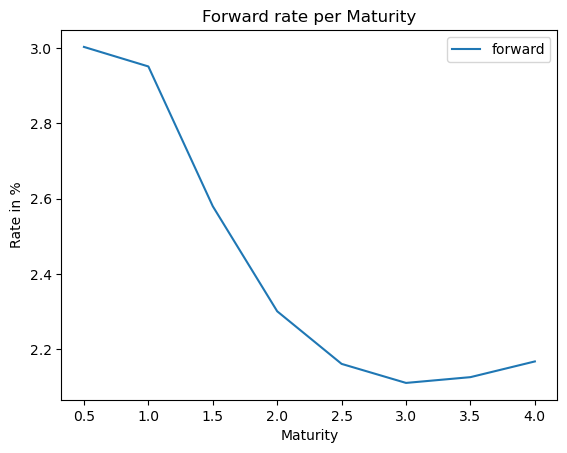

In [120]:
df_3.plot(x= 'Maturity', y='forward', title = 'Forward rate per Maturity',
          xlabel='Maturity', ylabel='Rate in %')

# Question 5

Assume that today is the 1st of January 2023. Assume that the French government issued today (1st of January 2023) a 3-year government bond that pays semi-annually a 4% coupon (par value = 1,000€).

a) Calculate the price of the bond using spot rates.

b) Calculate the price of the bond using forward rates.

c) What do you observe?

In [121]:
# Price of the semi-annual coupon

# Using Spot Rates

C = (0.04*1000)/2

# 3 years of maturity = 6 coupons delivered
M = 1000
Added = M / (1 + ((df_3['Spot_rate'][5]/100) / 2))**df_3['index_q4'][5]
Somme = 0
for i in range(0, 6):
    Somme += C / (1 + ((df_3['Spot_rate'][i]/100) / 2))**df_3['index_q4'][i]

P_spot = Somme + Added
print(round(P_spot, 2))

1042.63


In [122]:
# Using Forward Rates

C = (0.04*1000)/2

M = 1000
denominator = 1
test=1
Somme = 0
Added = 0
for i in range(0, 6):
    denominator = denominator * (1 + ((df_3['forward'][i]/100) / 2))
    Somme += (C / denominator)
Added = M / denominator

P_forw = Somme + Added
P_forw


# We find almost same results while using spot and forward rates 

1042.2370485126387

# Question 6

Assume that you have purchased the 3-year government bond 45 days after it was issued. Using the spot rates, calculate the
dirty and the clean price of the bond.

In [123]:
# Dirty Price
# Semi annual coupon

C = (0.04*1000)/2
w = 135 / 180 #European day count convention

M = 1000 # par-value

denominator = 1
Somme = 0
Added = 0

for i in range(0, 6):
    denominator = denominator * ((1 + ((df_3['Spot_rate'][i]/100) / 2)))**(i+w)
    Somme += (C / denominator)
    

N = 7  

Added = M / ((1 + ((df_3['Spot_rate'][7]/100) / 2)))**((N-1)+w)

P_dirty = Somme + Added
print('dirty price :', P_dirty)


# Clean price

# Accrued Interest

AI = C * w

P_clean = P_dirty - AI

print('clean price :', P_clean)

dirty price : 1029.517166926353
clean price : 1014.517166926353


# Question 7

Estimate the yield to maturity (YTM) of the bond calculated in question 5 a). Interpret.

Def : realized return anticipated on a bond if the bond is held until it matures and assuming all cash
flows are reinvested at the YTM. It is expressed as an annual rate.

In [124]:
from scipy.optimize import fsolve

# Define the equation
def equation(y, C, M, P):
    return (C/(y+1)**1) + (C/(y+1)**2) + (C/(y+1)**3) + (C/(y+1)**4) + (C/(y+1)**5) + (C/(y+1)**6) + (M/(y+1)**6) - P

# Define the parameters
C = C
M = 1000
P = P_spot

# Solve the equation for y using fsolve
y_solution = fsolve(equation, x0=0, args=(C, M, P))
YTM = round(float(y_solution), 5)

print("The Yield To Maturity (YTM) is:", YTM*100, '%')

The Yield To Maturity (YTM) is: 1.258 %


# Question 8

Plot the term structure of your spot rates. Interpret from a macroeconomic perspective.

<AxesSubplot:title={'center':'Spot rates per Maturity'}, xlabel='Maturity', ylabel='Rate in %'>

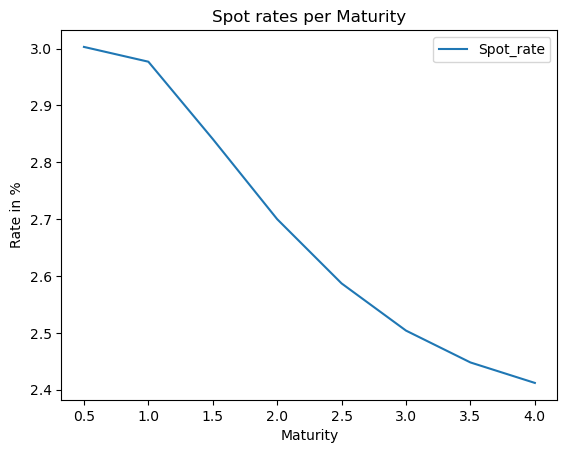

In [125]:
df_3.plot(x= 'Maturity', y='Spot_rate', title = 'Spot rates per Maturity',
          xlabel='Maturity', ylabel='Rate in %')

Downward slopping :
short-term yields are higher than long-term yields. Dubbed as an "inverted" yield curve and signifies
that the economy is in, or about to enter, a recessive period.

# Question 9

Using the bond parameters calculated in question 5 and the YTM estimated in question 7

a) Calculate DV01 for a two basis points decrease in YTM. Interpret.

DV01 - “dollar value of an 01”, measures the change in a fixed income security’s value in $ for every one basis point
change in interest rates. The “01” refers to one basis point (= 0.01% = 0.0001). It is a good measure for relatively small
changes in interest rates.

In [126]:
# Define starting YTM
YTM = YTM  # We take the one from Q.7

def Bond_price(YTM):
    P = (20/(YTM+1)**1) + (20/(YTM+1)**2) + (20/(YTM+1)**3) + (20/(YTM+1)**4) + (20/(YTM+1)**5) + (20/(YTM+1)**6) + (1000/(YTM+1)**6)
    return P

basis_point = 0.002

DV01 = Bond_price(YTM-basis_point) - Bond_price(YTM)

print(f"For a decrease of 1 basis point in YTM, the price of the bond will increase by: {DV01/2:.3f}$")
print(f"A decrease of 2 basis point in YTM will result in an increase of {DV01:.3f}$ in the price of the the bond")

For a decrease of 1 basis point in YTM, the price of the bond will increase by: 5.931$
A decrease of 2 basis point in YTM will result in an increase of 11.861$ in the price of the the bond


b) Calculate duration and convexity for a 1.5% increase and decrease in YTM. Interpret.

In [127]:
10/(200*0.005)

10.0

In [128]:
# Duration
# 15 basis points increase/decrease

basis_point = 0.15/100

D = (Bond_price(YTM-basis_point)-Bond_price(YTM+basis_point)) / (2*Bond_price(YTM)*basis_point)
print(D)
print(f"For a 30 basis point (0.3%) change in yield, the expected price change is {D:.2f}%",
      f"In other words, if the yield on this bond increases by 0.3%,",
      f"the price should decrease by about {D:.2f}%. If the yield decreases by 0.3%, the price of the bond should increase by about {D:.2f}%")

5.6495456244393525
For a 30 basis point (0.3%) change in yield, the expected price change is 5.65% In other words, if the yield on this bond increases by 0.3%, the price should decrease by about 5.65%. If the yield decreases by 0.3%, the price of the bond should increase by about 5.65%


In [129]:
# Convexity
basis_point = 0.0015

Cx = (Bond_price(YTM-basis_point)+Bond_price(YTM+basis_point) - 2*Bond_price(YTM)) / (Bond_price(YTM)*(basis_point**2))

print(f"A convexity of {Cx:.2f} cannot be conveniently converted into some measure of,",
"potential price volatility. The convexity value means nothing in isolation. However, it becomes very useful", 
"when it is used to, measure a bond’s convexity effect.")

A convexity of 38.42 cannot be conveniently converted into some measure of, potential price volatility. The convexity value means nothing in isolation. However, it becomes very useful when it is used to, measure a bond’s convexity effect.


c) Calculate the change in bond price for a 2.6% increase and decrease in YTM using the duration/convexity approach.
Interpret.

Estimation with both “duration” and “convexity” - by combining “duration” and “convexity”, a far more accurate estimate
of the percentage change in the price of a bond can be obtained, especially for large changes in interest rates

In [130]:
# Parameters

# We understood the exercice like we had to keep the duration and convexity calculated before
# With a 15 basis points increase and decrease.

D = D/100
Cx = Cx
V = Bond_price(YTM)
change = 2.6/100

increase = ((-D)*(-change)*V) + (0.5*Cx*((-change)**2)*V)
decrease = ((-D)*(+change)*V) + (0.5*Cx*(change**2)*V)

print(f"If YTM increases (decreases) by 2.6%, the value of the bond will decrease (increase) by {-1*decrease:.2f}% ({increase:.2f}%).")

If YTM increases (decreases) by 2.6%, the value of the bond will decrease (increase) by -12.01% (15.07%).


# Question 10

In [136]:
#Create a hedging strategy with the first bond using the DV01 measure. Interpret.
DV01_2 = 10
D_2 = 0.08
Cx_2 = 45

#To determine the face amount of the bond required to hedge this 17.5m bond exposure, we use the following approach:
face_value = 17.5*(DV01/DV01_2)
print(f"To hedge our 17.5m position of bond 1 with bond 2, the investor must short €{face_value:.3f} millions in face value of the bond 2.")

To hedge our 17.5m position of bond 1 with bond 2, the investor must short €20.757 millions in face value of the bond 2.


In [144]:
# Create a hedging strategy with the second bond using the duration measure. Interpret.
DV01_3 = 12
D_3 = 0.03
Cx_3 = 30

#To determine the face amount of the bond required to hedge this 17.5m bond exposure, we use the following approach:
vhi = (D*17.5)/D_3
print(f"To hedge our 17.5m position of bond 1 with bond 3, the investor must be long €{vhi:.3f} millions in face value of the bond 3.")

To hedge our 17.5m position of bond 1 with bond 3, the investor must be long €32.956 millions in face value of the bond 3.


In [141]:
#Create a hedging strategy with the two bonds using the duration/convexity approach. Interpret.

def equations(variables):
    vh1, vh2 = variables
    eq1 = 17.5 * D - vh1 * D_2 - vh2 * Cx
    eq2 = 17.5 * D_3 - vh1 * Cx_2 - vh2 * Cx_3
    return [eq1, eq2]

# Define the known values of the other variables
D = D
D_2 = D_2
D_3 = D_3
Cx = Cx
Cx_2 = Cx_2
Cx_3 = Cx_3

# Initial guess for the unknown variables
x0 = [1.0, 1.0]

# Solve the equations
solution = fsolve(equations, x0)

# Extract the values of vh1 and vh2 from the solution
vh1, vh2 = solution

print("vh1 =", vh1)
print("vh2 =", vh2)

vh1 = -0.00549446041088256
vh2 = 0.02574169061632384
